In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
tf.__version__

'2.1.0'

In [5]:
keras.__version__

'2.2.4-tf'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [11]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
X_test = X_test / 255.0

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

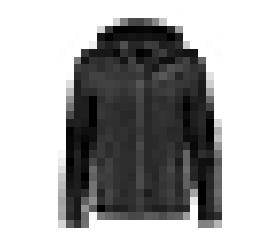

In [14]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names = ["T-shit/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
class_names[y_train[0]]  # [4]

'Coat'

In [18]:
X_valid.shape

(5000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

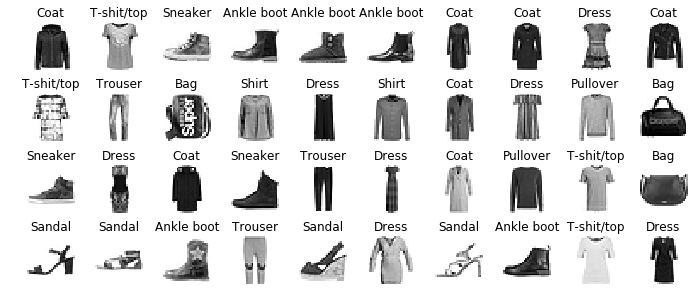

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))  # ==> 784
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
keras.backend.clear_session()

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# ! conda install graphviz -y
# ! conda install pydot -y
# ! conda install python-graphviz -y

In [27]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [28]:
hidden1 = model.layers[1]

In [29]:
hidden1.name

'dense'

In [30]:
weights, biases = hidden1.get_weights()

In [31]:
weights

array([[-0.04038127, -0.04976836, -0.06590045, ..., -0.04702529,
         0.05915691, -0.06596284],
       [-0.03382726,  0.02876679, -0.04734139, ...,  0.04755606,
        -0.0364277 , -0.05605409],
       [ 0.04619209,  0.05146372, -0.05879166, ...,  0.0637109 ,
        -0.02918177, -0.02007945],
       ...,
       [-0.03704232,  0.07168089,  0.05223852, ...,  0.06906299,
        -0.07351095,  0.06744127],
       [ 0.02383405,  0.0309064 ,  0.03188834, ...,  0.06095605,
         0.02565167, -0.0521073 ],
       [-0.00102863, -0.05402172, -0.06967431, ...,  0.06450135,
         0.03021227, -0.02496143]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", metrics=["accuracy"])

In [36]:
%%time
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
# Epoch 30/30
# 55000/55000 [==============================] - 7s 135us/sample - loss: 0.2283 - accuracy: 0.9178 - val_loss: 0.2856 - val_accuracy: 0.8966
# Wall time: 3min 35s

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 63us/sample - loss: 0.7054 - accuracy: 0.7689 - val_loss: 0.5075 - val_accuracy: 0.8298
Epoch 2/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.4864 - accuracy: 0.8303 - val_loss: 0.4600 - val_accuracy: 0.8418
Epoch 3/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.4439 - accuracy: 0.8447 - val_loss: 0.4380 - val_accuracy: 0.8514
Epoch 4/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.4158 - accuracy: 0.8528 - val_loss: 0.4158 - val_accuracy: 0.8618
Epoch 5/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.3961 - accuracy: 0.8604 - val_loss: 0.3826 - val_accuracy: 0.8660
Epoch 6/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3800 - accuracy: 0.8668 - val_loss: 0.3767 - val_accuracy: 0.8700
Epoch 7/30
55000/55000 [==============================] -

In [37]:
hist.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [38]:
print(hist.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [39]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

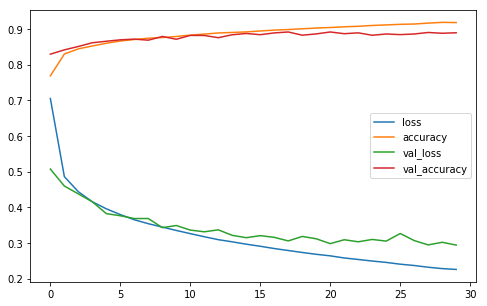

In [40]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

In [41]:
model.evaluate(X_test, y_test)
# [0.32513083802461623, 0.8841], [loss, accuracy]

10000/10000 [==============================] - 0s 24us/sample - loss: 0.3309 - accuracy: 0.8837


[0.3308595157623291, 0.8837]

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

#        [0   , 1  ,  2  ,  3  ,  4  ,  5  ,  6  ,  7,    8  ,  9]
# array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
#        [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
#        [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
#       dtype=float32)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
y_pred = model.predict_classes(X_new)
y_pred
# array([9, 2, 1], dtype=int64)

array([9, 2, 1], dtype=int64)

In [44]:
np.array(class_names)[y_pred]
# array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

In [45]:
y_new = y_test[:3]
y_new
# array([9, 2, 1], dtype=uint8)

array([9, 2, 1], dtype=uint8)

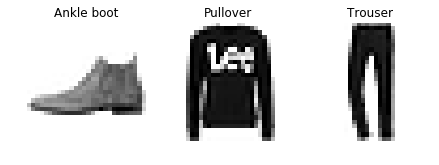

In [46]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index+1)
    plt.imshow(image, cmap='binary', interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [47]:
# 회귀(regression)

In [48]:
# ! conda install scikit-learn==0.21.2 -y

In [49]:
from sklearn.datasets import fetch_california_housing

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.preprocessing import StandardScaler

In [72]:
housing = fetch_california_housing()

In [73]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [75]:
scaler = StandardScaler()

In [76]:
X_train = scaler.fit_transform(X_train)

In [77]:
X_valid = scaler.transform(X_valid)

In [78]:
X_test = scaler.transform(X_test)

In [79]:
np.random.seed(42)

In [80]:
tf.random.set_seed(42)

In [81]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
])

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3)) # lr == learning rate

In [84]:
%%time
hist = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 46us/sample - loss: 1.6205 - val_loss: 2.0374
Epoch 2/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.7162 - val_loss: 0.6571
Epoch 3/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6356 - val_loss: 0.5996
Epoch 4/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5989 - val_loss: 0.5662
Epoch 5/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5713 - val_loss: 0.5489
Epoch 6/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5491 - val_loss: 0.5204
Epoch 7/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5301 - val_loss: 0.5018
Epoch 8/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5142 - val_loss: 0.4815
Epoch 9/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5004 - val_l

In [85]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 12us/sample - loss: 0.4218


In [93]:
mse_test

0.42177125668340876

In [86]:
X_new = X_test[:3]

In [87]:
X_new

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

In [88]:
y_pred = model.predict(X_new)

In [89]:
y_pred

array([[0.37310117],
       [1.6790794 ],
       [3.0817142 ]], dtype=float32)

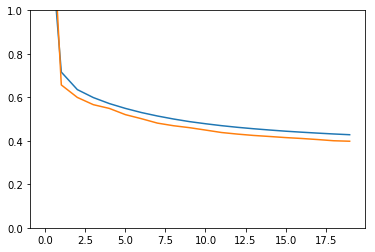

In [90]:
plt.plot(pd.DataFrame(hist.history))
plt.gca().set_ylim(0, 1)
plt.show()

In [104]:
# 함수형 api

In [105]:
np.random.seed(42)
tf.random.set_seed(42)

In [106]:
keras.backend.clear_session()

In [107]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [108]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [109]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [110]:
%%time
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 50us/sample - loss: 1.2390 - val_loss: 0.6566
Epoch 2/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.6312 - val_loss: 0.6734
Epoch 3/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5886 - val_loss: 0.5574
Epoch 4/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5595 - val_loss: 0.5235
Epoch 5/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5361 - val_loss: 0.5011
Epoch 6/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5178 - val_loss: 0.5065
Epoch 7/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5016 - val_loss: 0.4699
Epoch 8/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4888 - val_loss: 0.4745
Epoch 9/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4772 - val_l

In [111]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 15us/sample - loss: 0.4042


In [113]:
y_pred = model.predict(X_new)
y_pred

array([[0.47253639],
       [1.8545786 ],
       [3.3418884 ]], dtype=float32)

In [114]:
np.random.seed(42)
tf.random.set_seed(42)

In [115]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [116]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [118]:
%%time
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6903 - val_loss: 0.9814
Epoch 2/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5981 - val_loss: 0.5847
Epoch 3/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5554 - val_loss: 0.5306
Epoch 4/10
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5274 - val_loss: 0.5004
Epoch 5/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5036 - val_loss: 0.5383
Epoch 6/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4863 - val_loss: 0.4526
Epoch 7/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4701 - val_loss: 0.4425
Epoch 8/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4580 - val_loss: 0.4322
Epoch 9/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4473 - val_l

In [119]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 13us/sample - loss: 0.4302


In [120]:
model.save("my_keras_model.h5")

In [121]:
model = keras.models.load_model("my_keras_model.h5")

In [122]:
model.predict(X_new)

array([[0.5340375],
       [1.6889803],
       [3.057781 ]], dtype=float32)

In [125]:
model.save_weights("my_keras_weights.ckpt")

In [126]:
model.load_weights("my_keras_weights.ckpt")

In [127]:
model

In [128]:
model.weights

[<tf.Variable 'dense_3_1/kernel:0' shape=(8, 30) dtype=float32, numpy=
 array([[ 0.15667705, -0.0007787 , -0.1119658 , -0.13845617, -0.37613183,
          0.08834749,  0.2047377 ,  0.38958013, -0.14272591, -0.32160357,
         -0.16474263,  0.1720392 , -0.23700859,  0.06831226,  0.12291494,
          0.39945844, -0.27476487,  0.0031381 ,  0.06003917, -0.27924764,
          0.17689066, -0.00590228, -0.28959322,  0.29231524,  0.14892223,
         -0.09545671,  0.09296145, -0.20349735,  0.28935796,  0.05703921],
        [ 0.34072047, -0.16882065,  0.2430051 , -0.02603088, -0.0165198 ,
         -0.20242089,  0.2609368 ,  0.23585266, -0.15245296,  0.1240295 ,
         -0.19297984,  0.17667729,  0.41815907, -0.35254362,  0.2205449 ,
          0.09728137,  0.05544778, -0.25777546,  0.1885762 , -0.13840702,
          0.06786091, -0.01242388,  0.4061833 ,  0.12897006, -0.16011858,
          0.31147265, -0.03545516, -0.26906663,  0.21120398, -0.12544562],
        [-0.15792753, -0.14653885,  0.0

In [129]:
# callback 사용하기

In [131]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [132]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [133]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [134]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [135]:
%%time
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),
                 callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 78us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/10
11610/11610 [==============================] - 0s 31us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4576 - val_l

In [136]:
model = keras.models.load_model("my_keras_model.h5")

In [137]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 23us/sample - loss: 0.4376


In [139]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [145]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [146]:
%%time
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3215 - val_loss: 0.3727
Epoch 2/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3216 - val_loss: 0.3100
Epoch 3/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3209 - val_loss: 0.3614
Epoch 4/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3210 - val_loss: 0.3101
Epoch 5/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3204 - val_loss: 0.3676
Epoch 6/100
11610/11610 [==============================] - 0s 26us/sample - loss: 0.3205 - val_loss: 0.3111
Epoch 7/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3200 - val_loss: 0.3148
Wall time: 2.3 s


In [147]:
# 사용자 정의 callback

In [148]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs['val_loss'] / logs['loss']))

In [149]:
val_train_ration_cb = PrintValTrainRatioCallback()

In [150]:
hist = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid),
                callbacks=[val_train_ration_cb])

Train on 11610 samples, validate on 3870 samples
 9568/11610 [=======================>......] - ETA: 0s - loss: 0.3135
val/train: 1.03
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3208 - val_loss: 0.3302


In [151]:
# hyper_parameter tunning

In [152]:
keras.backend.clear_session()

In [153]:
np.random.seed(42)

In [154]:
tf.random.set_seed(42)

In [155]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [156]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [157]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 54us/sample - loss: 1.1399 - val_loss: 24.4309
Epoch 2/100
11610/11610 [==============================] - 0s 26us/sample - loss: 0.7393 - val_loss: 3.2896
Epoch 3/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5374 - val_loss: 0.6080
Epoch 4/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4796 - val_loss: 0.4532
Epoch 5/100
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4536 - val_loss: 0.4221
Epoch 6/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4373 - val_loss: 0.4144
Epoch 7/100
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4256 - val_loss: 0.4025
Epoch 8/100
11610/11610 [==============================] - 0s 24us/sample - loss: 0.4178 - val_loss: 0.3938
Epoch 9/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.41

In [158]:
mse_test = keras_reg.score(X_test, y_test)

5160/5160 [==============================] - 0s 12us/sample - loss: 0.3473


In [160]:
y_pred = keras_reg.predict(X_new)

In [161]:
np.random.seed(42)
tf.random.set_seed(42)
keras.backend.clear_session()

In [162]:
from scipy.stats import reciprocal

In [163]:
from sklearn.model_selection import RandomizedSearchCV

In [168]:
# param_distribs = {
#     "n_hidden": [0, 1, 2, 3], 
#     "n_neurons": np.arange(1, 100),
#     "learning_rate": reciprocal(3e-4, 3e-2)
# }

In [ ]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3], 
    "n_neurons": ,
    "learning_rate": reciprocal(3e-4, 3e-2)
}

In [169]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

In [ ]:
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])